# Simple Moving Average Based Strategy 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import FB's stock data, add two columns - MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.DataFrame.read_csv("insert url here")
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

AttributeError: type object 'DataFrame' has no attribute 'read_csv'

In [4]:
#if the MA10 is greater than MA50, long the shares proportion to change in open price over yesterday's close price 

fb['Close1'] = fb['Close'].shift(-1)
fb['Shares'] = [ (fb.loc[ei,'Open']/fb.loc[ei,'Close1']*10) if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 1 for ei in fb.index]
fb.head()

NameError: name 'fb' is not defined

In [5]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']>=0 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

NameError: name 'fb' is not defined

In [41]:
#Use .cumsum() to calculate the accumulated wealth over the period

fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,9.809194,245.800003,3.080002,223.100002
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,10.219127,240.500000,-5.300003,217.799999
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,10.214114,233.520004,-6.979996,210.820003
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,11.090314,213.699997,-19.820007,190.999996
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,NaN,NaN,0.000000,190.999996


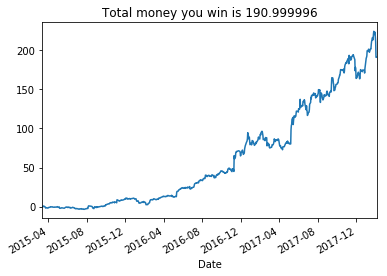

In [42]:
#plot the wealth to show the growth of profit over the period

fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))